In [237]:
import time 
import pickle

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
from collections import defaultdict

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor

import optuna
from xgboost import XGBClassifier, XGBRegressor
from optuna.integration import XGBoostPruningCallback
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error


from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import Normalize


import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from tqdm import tqdm

from torch.utils.data import Dataset, DataLoader, TensorDataset, random_split

np.random.seed(0)
torch.manual_seed(0)

In [238]:
path = 'ui_data.csv'  
data = pd.read_csv(path)
print(data.shape)

(1984, 10)


In [239]:
# # # Set max valid RSSI to 200
# data.iloc[:, [8, 9]] = data.iloc[:, [8, 9]].clip(upper=-110)

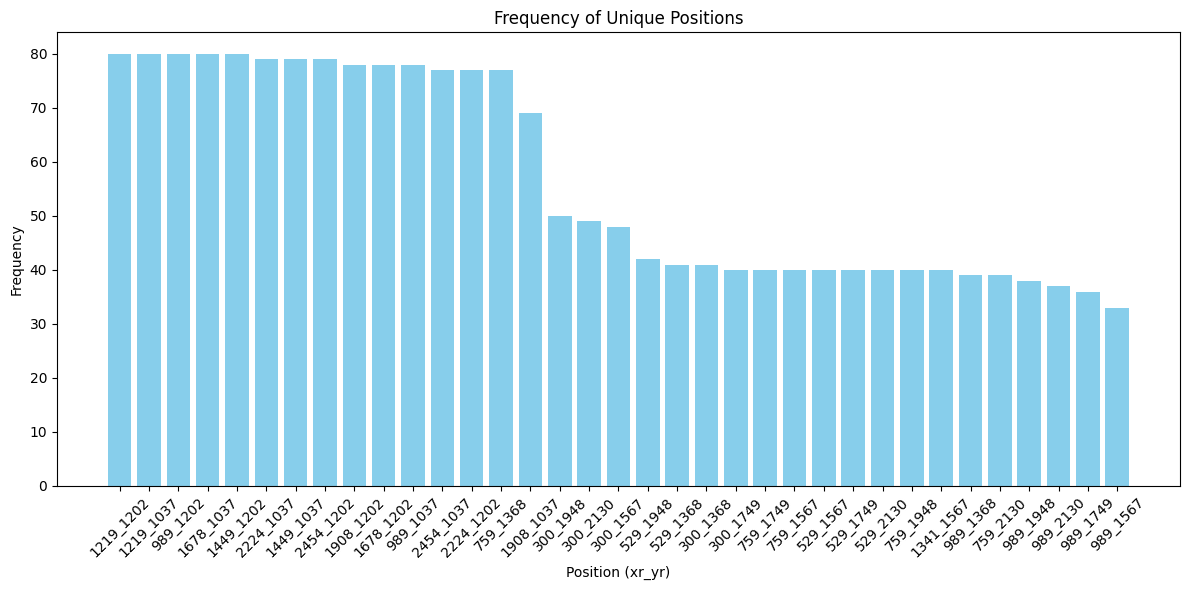

In [240]:
# Assuming your DataFrame is named `df`

# Step 1: Combine `xr` and `yr`
data['position'] = data['xr'].astype(str) + '_' + data['yr'].astype(str)

# Step 2: Count the frequency of each unique position
frequency = data['position'].value_counts()

# If you want to reset the index and get a DataFrame
frequency_df = frequency.reset_index()
frequency_df.columns = ['position', 'frequency']

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(frequency_df['position'], frequency_df['frequency'], color='skyblue')
plt.xlabel('Position (xr_yr)')
plt.ylabel('Frequency')
plt.title('Frequency of Unique Positions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [241]:
data.drop(columns=['position'], inplace=True)
data.sample(5)


,time,reference_point,iteration,ssid,bssid,channel,xr,yr,rssi_ap_digilab,rssi_ap_dosen
1321,2024-10-23T07:24:12.0806722Z,RP41,3,DTE Staff,72:a7:41:9c:8e:55,1,2454,1037,NaN,-64.0
76,2024-10-17T09:00:17.7162749Z,RP2,18,DTE Student,72:a7:41:9c:77:cd,11,300,1567,-63.0,NaN
530,2024-10-17T10:31:15.9076145Z,RP30,6,DTE Staff,70:a7:41:dc:77:cd,11,989,1202,-42.0,NaN
629,2024-10-17T10:43:18.5225359Z,RP37,11,DTE Student,72:a7:41:9c:77:cd,11,1908,1037,-53.0,NaN
1503,2024-10-23T07:47:25.3377242Z,RP39,10,DTE Staff,70:a7:41:dc:77:cd,11,2224,1037,-61.0,NaN


C:\Users\laure\AppData\Local\Temp\ipykernel_4940\3898255427.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='reference_point', y='rssi_ap_digilab', palette='Set3')
C:\Users\laure\AppData\Local\Temp\ipykernel_4940\3898255427.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='reference_point', y='rssi_ap_dosen', palette='Set3')


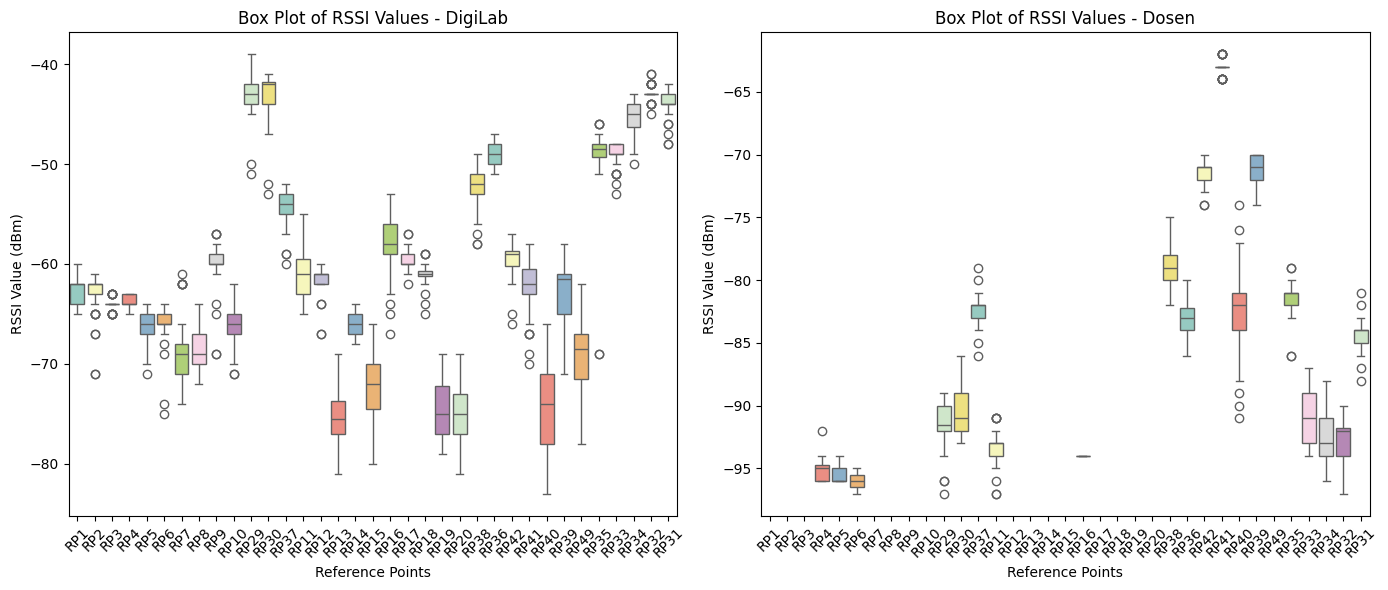

C:\Users\laure\AppData\Local\Temp\ipykernel_4940\3898255427.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='reference_point', y='rssi_ap_digilab', palette='Set3')
C:\Users\laure\AppData\Local\Temp\ipykernel_4940\3898255427.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='reference_point', y='rssi_ap_dosen', palette='Set3')


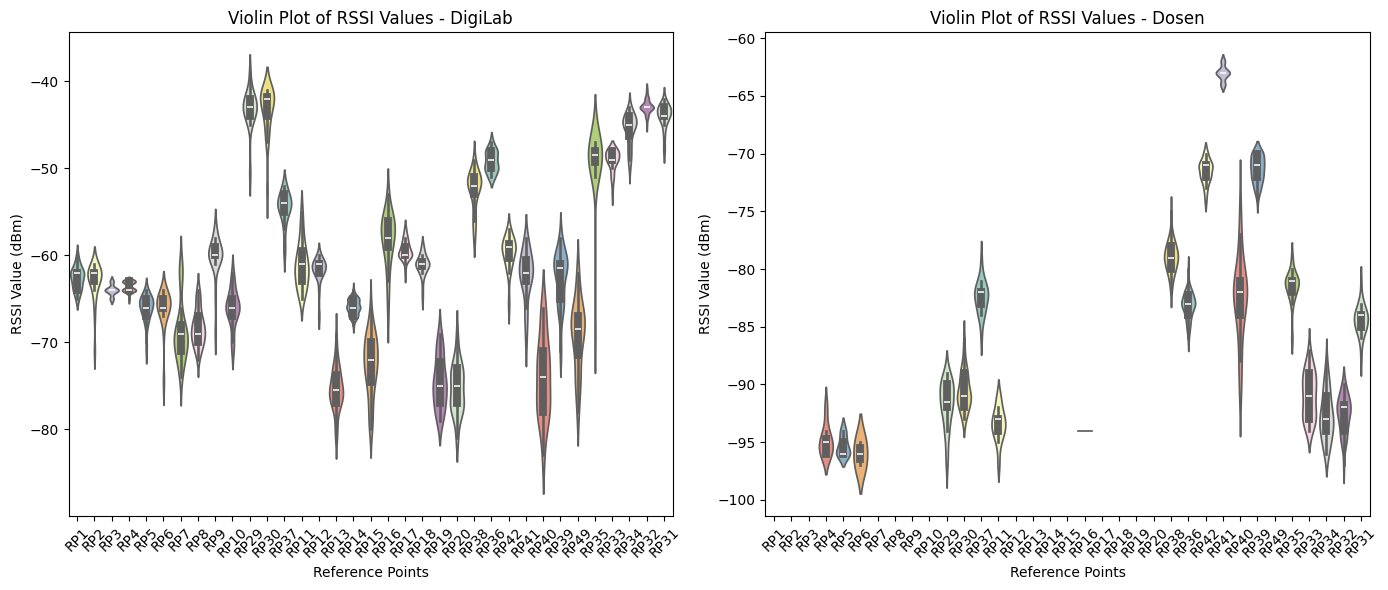

In [242]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(14, 6))  # Increased width for better label visibility

# Box plot for rssi_ap_digilab
plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='reference_point', y='rssi_ap_digilab', palette='Set3')
plt.title('Box Plot of RSSI Values - DigiLab')
plt.ylabel('RSSI Value (dBm)')
plt.xlabel('Reference Points')
plt.xticks(rotation=45)  # Rotate x labels for better visibility

# Box plot for rssi_ap_dosen
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='reference_point', y='rssi_ap_dosen', palette='Set3')
plt.title('Box Plot of RSSI Values - Dosen')
plt.ylabel('RSSI Value (dBm)')
plt.xlabel('Reference Points')
plt.xticks(rotation=45)  # Rotate x labels for better visibility

plt.tight_layout()
plt.show()

# Now for the Violin plots
plt.figure(figsize=(14, 6))  # Increased width for better label visibility

# Violin plot for rssi_ap_digilab
plt.subplot(1, 2, 1)
sns.violinplot(data=data, x='reference_point', y='rssi_ap_digilab', palette='Set3')
plt.title('Violin Plot of RSSI Values - DigiLab')
plt.ylabel('RSSI Value (dBm)')
plt.xlabel('Reference Points')
plt.xticks(rotation=45)  # Rotate x labels for better visibility

# Violin plot for rssi_ap_dosen
plt.subplot(1, 2, 2)
sns.violinplot(data=data, x='reference_point', y='rssi_ap_dosen', palette='Set3')
plt.title('Violin Plot of RSSI Values - Dosen')
plt.ylabel('RSSI Value (dBm)')
plt.xlabel('Reference Points')
plt.xticks(rotation=45)  # Rotate x labels for better visibility

plt.tight_layout()
plt.show()


In [243]:
data['rssi_ap_dosen'].unique()

array([ nan, -96., -94., -95., -92., -97., -90., -89., -91., -93., -86.,
       -88., -87., -81., -82., -83., -84., -85., -79., -80., -78., -77.,
       -75., -70., -71., -72., -73., -74., -63., -64., -62., -76.])

In [244]:
# Fill missing RSSI values
data['rssi_ap_digilab'] = data['rssi_ap_digilab'].fillna(-200)
data['rssi_ap_dosen'] = data['rssi_ap_dosen'].fillna(-200)

In [245]:
ap_coordinates = {
    'DTE Staff (Digilab)': (867, 1122),
    'DTE Staff (Dosen)': (2454, 520)
}

In [246]:
# Define reference points that should be assigned a relative position of 0
inside_reference_points = [f'RP{i}' for i in range(1, 21)]  # RP_1 to RP_20

# Add a new column for relative position based on the reference point value
data['relative_position'] = data['reference_point'].apply(lambda rp: 0 if rp in inside_reference_points else 1)

# Check the first few rows to confirm the relative_position column was added correctly
print(data[['reference_point', 'relative_position']].head())

  reference_point  relative_position
0             RP1                  0
1             RP1                  0
2             RP1                  0
3             RP1                  0
4             RP1                  0


In [247]:
# Convert the 'time' column to datetime format
data['time'] = pd.to_datetime(data['time'])
# Convert to seconds since the epoch
data['time_numeric'] = data['time'].apply(lambda x: x.time())

In [248]:
# Define the mapping dictionary
bssid_mapping = {
    '70:a7:41:dc:8e:55': 1,
    '72:a7:41:9c:8e:55': 2,
    '70:a7:41:dc:77:cd': 3,
    '72:a7:41:9c:77:cd': 4
}

In [249]:
data['bssid'] = data['bssid'].map(bssid_mapping)
print(data[['bssid', 'bssid']].head())


   bssid  bssid
0      4      4
1      3      3
2      4      4
3      4      4
4      3      3


In [250]:
# Assuming 'reference_point' is your column name in the DataFrame
data['reference_point'] = data['reference_point'].str.replace('RP', '').astype(int)

# Check the result
print(data['reference_point'])

0        1
1        1
2        1
3        1
4        1
        ..
1979    31
1980    31
1981    31
1982    31
1983    31
Name: reference_point, Length: 1984, dtype: int64


In [251]:
data.sample(10)

,time,reference_point,iteration,ssid,bssid,channel,xr,yr,rssi_ap_digilab,rssi_ap_dosen,relative_position,time_numeric
1535,2024-10-23 07:51:33.349010300+00:00,39,18,DTE Staff,1,1,2224,1037,-200.0,-70.0,1,07:51:33.349010
1118,2024-10-23 06:49:29.038629800+00:00,38,11,DTE Staff,2,1,1908,1202,-200.0,-81.0,1,06:49:29.038629
727,2024-10-23 02:54:11.383374+00:00,11,19,DTE Student,4,11,759,1368,-62.0,-200.0,0,02:54:11.383374
1969,2024-10-23 09:32:11.607256700+00:00,31,17,DTE Staff,3,11,1219,1037,-43.0,-200.0,1,09:32:11.607256
1801,2024-10-23 09:11:44.641679+00:00,34,15,DTE Staff,3,11,1449,1202,-48.0,-200.0,1,09:11:44.641679
1189,2024-10-23 06:59:47.263419+00:00,36,10,DTE Student,4,11,1678,1202,-48.0,-200.0,1,06:59:47.263419
1493,2024-10-23 07:46:12.622958300+00:00,39,7,DTE Student,4,11,2224,1037,-71.0,-200.0,1,07:46:12.622958
325,2024-10-17 09:56:32.853301100+00:00,8,9,DTE Staff,3,11,529,1749,-67.0,-200.0,0,09:56:32.853301
329,2024-10-17 09:57:12.471909200+00:00,8,11,DTE Student,4,11,529,1749,-64.0,-200.0,0,09:57:12.471909
1849,2024-10-23 09:18:01.989219900+00:00,32,7,DTE Student,4,11,1219,1202,-43.0,-200.0,1,09:18:01.989219


In [252]:
def encode_and_save_labels(data, column_name, encoder_file_name='label_encoder.pkl'):
    # Initialize the LabelEncoder
    le = LabelEncoder()
    
    # Fit and transform the data
    encoded_values = le.fit_transform(data[column_name])
    
    # Replace the original column with encoded values
    data[column_name] = encoded_values
    
    # Save the encoder to a file
    with open(encoder_file_name, 'wb') as file:
        pickle.dump(le, file)
    
    print(f"Encoded {column_name} and saved encoder to {encoder_file_name}")
    
    return data

def decode_labels(data, column_name, encoder_file_name='label_encoder.pkl'):
    # Load the encoder from the file
    with open(encoder_file_name, 'rb') as file:
        le = pickle.load(file)
    
    # Transform the encoded values back to original labels
    decoded_values = le.inverse_transform(data[column_name])
    
    # Replace the encoded column with decoded values
    data[column_name] = decoded_values
    
    print(f"Decoded {column_name} using encoder from {encoder_file_name}")
    
    return data

def decode_predictions(y_pred, encoder_file_name='label_encoder.pkl'):
    # Load the encoder from the file
    with open(encoder_file_name, 'rb') as file:
        le = pickle.load(file)
    
    # Transform the encoded predictions back to original labels
    decoded_predictions = le.inverse_transform(y_pred)
    
    print(f"Decoded predictions using encoder from {encoder_file_name}")
    
    return decoded_predictions

In [253]:
print("Columns in DataFrame:", data.columns)
print("Shape of DataFrame:", data.shape)

Columns in DataFrame: Index(['time', 'reference_point', 'iteration', 'ssid', 'bssid', 'channel',
       'xr', 'yr', 'rssi_ap_digilab', 'rssi_ap_dosen', 'relative_position',
       'time_numeric'],
      dtype='object')
Shape of DataFrame: (1984, 12)


In [254]:
df = data.iloc[:, [1, 2, 4, 5, 8 , 9, 10]]
print("\nColumns in X:", df.columns.tolist())

df = encode_and_save_labels(df, 'reference_point')
df = df.rename(columns={'reference_point': 'label'})


Columns in X: ['reference_point', 'iteration', 'bssid', 'channel', 'rssi_ap_digilab', 'rssi_ap_dosen', 'relative_position']
Encoded reference_point and saved encoder to label_encoder.pkl


C:\Users\laure\AppData\Local\Temp\ipykernel_4940\2956030956.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = encoded_values


In [255]:
df

,label,iteration,bssid,channel,rssi_ap_digilab,rssi_ap_dosen,relative_position
0,0,3,4,11,-64.0,-200.0,0
1,0,1,3,11,-63.0,-200.0,0
2,0,1,4,11,-63.0,-200.0,0
3,0,2,4,11,-64.0,-200.0,0
4,0,2,3,11,-65.0,-200.0,0
...,...,...,...,...,...,...,...
1979,22,19,2,1,-200.0,-83.0,1
1980,22,20,4,11,-43.0,-200.0,1
1981,22,20,3,11,-43.0,-200.0,1
1982,22,20,1,1,-200.0,-83.0,1


## Scaling using Robust Scaler


### Are there overlapping points?

In [256]:
binned_data = df.copy()
binned_data.iloc[:, :-1] = np.round(binned_data.iloc[:, :-1]) 
overlapping_points = binned_data.groupby(list(binned_data.columns[:-1]))['label'].nunique()
overlapping_points = overlapping_points[overlapping_points > 1]
overlapping_data = binned_data.set_index(list(binned_data.columns[:-1])).loc[overlapping_points.index]

overlapping_data

,,,,,,relative_position
label,iteration,bssid,channel,rssi_ap_digilab,rssi_ap_dosen,


In [257]:
# delete overlapping data 
non_overlapping_mask = ~binned_data.set_index(list(binned_data.columns[:-1])).index.isin(overlapping_points.index)
df = df[non_overlapping_mask]
df.shape

(1984, 7)

## Regression Model

In [258]:
X = data.iloc[:, [1, 4, 5, 8 , 9, 10]]
y = data.iloc[:, [6, 7]] # Selecting reference_point (ap_name), xr (x), yr (y)

In [259]:
print("\nColumns in X:", X.columns.tolist())
print("Columns in y:", y.columns.tolist())


Columns in X: ['reference_point', 'bssid', 'channel', 'rssi_ap_digilab', 'rssi_ap_dosen', 'relative_position']
Columns in y: ['xr', 'yr']


In [260]:
print(X.head())
print(X.dtypes)

   reference_point  bssid  channel  rssi_ap_digilab  rssi_ap_dosen  \
0                1      4       11            -64.0         -200.0   
1                1      3       11            -63.0         -200.0   
2                1      4       11            -63.0         -200.0   
3                1      4       11            -64.0         -200.0   
4                1      3       11            -65.0         -200.0   

   relative_position  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
reference_point        int64
bssid                  int64
channel                int64
rssi_ap_digilab      float64
rssi_ap_dosen        float64
relative_position      int64
dtype: object


In [261]:
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        if isinstance(features, np.ndarray): self.features = torch.tensor(features, dtype=torch.float32)
        else: self.features = torch.tensor(features.values, dtype=torch.float32)
        self.labels = torch.tensor(labels.values, dtype=torch.long)
    
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

dataset = CustomDataset(robust_scaled_data, y)

train_size = int(0.7 * len(dataset))
val_size = int(0.2 * len(dataset))
test_size = len(dataset) - train_size - val_size

regression_data_scaled = RobustScaler().fit_transform(X)
dataset = CustomDataset(regression_data_scaled, y)
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

In [262]:
print("\nColumns in X:", X.columns.tolist())
print("Columns in y:", y.columns.tolist())


Columns in X: ['reference_point', 'bssid', 'channel', 'rssi_ap_digilab', 'rssi_ap_dosen', 'relative_position']
Columns in y: ['xr', 'yr']


In [263]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Assuming X and y are preprocessed and split-ready
# Ensure y is a numpy array
y = np.array(y)  # Convert to numpy array if y is a pandas DataFrame or Series

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Mean Squared Error: 4111.9788
MSE for x: 1495.4242
MSE for y: 6728.5334
Number of predictions: 397


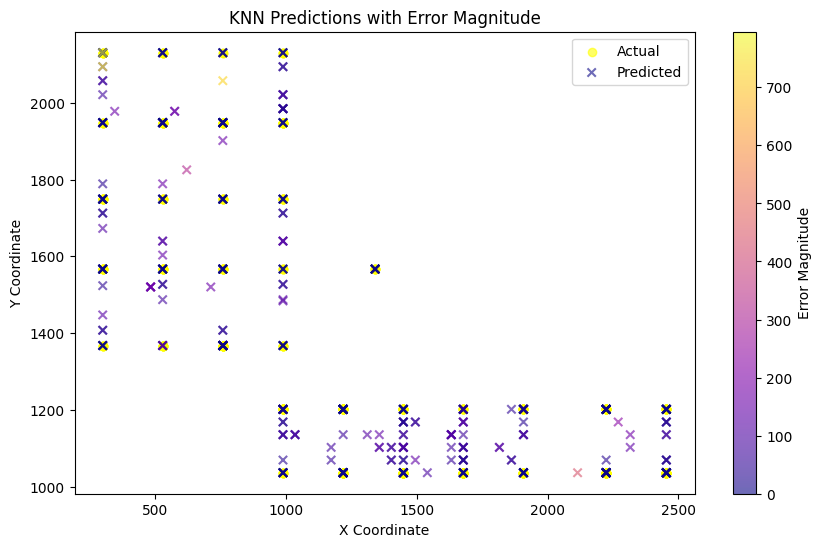

In [264]:
# Initialize the KNN Regressor with a specified number of neighbors
k = 5  # You can adjust this based on your data for optimal performance
knn = KNeighborsRegressor(n_neighbors=k)

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Calculate and print MSE for each coordinate
y_test = np.array(y_test)  # Convert to numpy array if needed
y_pred = np.array(y_pred)  # Convert to numpy array if needed

for i, coord in enumerate(['x', 'y']):
    coord_mse = mean_squared_error(y_test[:, i], y_pred[:, i])
    print(f"MSE for {coord}: {coord_mse:.4f}")
    
# Calculate the error magnitude for each coordinate pair prediction
errors = np.sqrt((y_test[:, 0] - y_pred[:, 0])**2 + (y_test[:, 1] - y_pred[:, 1])**2)

print(f"Number of predictions: {len(y_pred)}")

# Plotting
plt.figure(figsize=(10, 6))

# Plot actual coordinates in blue
plt.scatter(y_test[:, 0], y_test[:, 1], c='yellow', label='Actual', alpha=0.6)

# Plot predicted coordinates with color intensity representing error magnitude using 'plasma' colormap
scatter = plt.scatter(y_pred[:, 0], y_pred[:, 1], c=errors, cmap='plasma', marker='x', label='Predicted', alpha=0.6)

# Add color bar to interpret error magnitude
cbar = plt.colorbar(scatter)
cbar.set_label('Error Magnitude')

# Labels and title
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("KNN Predictions with Error Magnitude")
plt.legend()
plt.show()


In [265]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE: {-np.mean(scores):.4f}")


Cross-validated MSE: 84427.1293


In [266]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr:.4f}")


Linear Regression MSE: 43812.2412
